In [25]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-flops-lufact)

We'll test the conclusion of $O(n^3)$ flops experimentally, using the built-in `lu` function instead of the purely instructive `lufact`.
```{tip}
:class: dropdown
The first time a function is invoked, there may be significant time needed to compile it in memory. Thus, when timing a function, run it at least once before beginning the timing.
```

In [26]:
n = (200:100:2400)';
t = zeros(size(n));
for k = 1:length(n)
    A = randn(n(k), n(k));  
    tic    % start a timer
    for j = 1:6,  [L, U] = lu(A);  end
    time = toc;
    t(k) = time / 6;  
end

We plot the timings on a log-log graph and compare it to $O(n^3)$. The result could vary significantly from machine to machine, but in theory the data should start to parallel the line as $n\to\infty$.

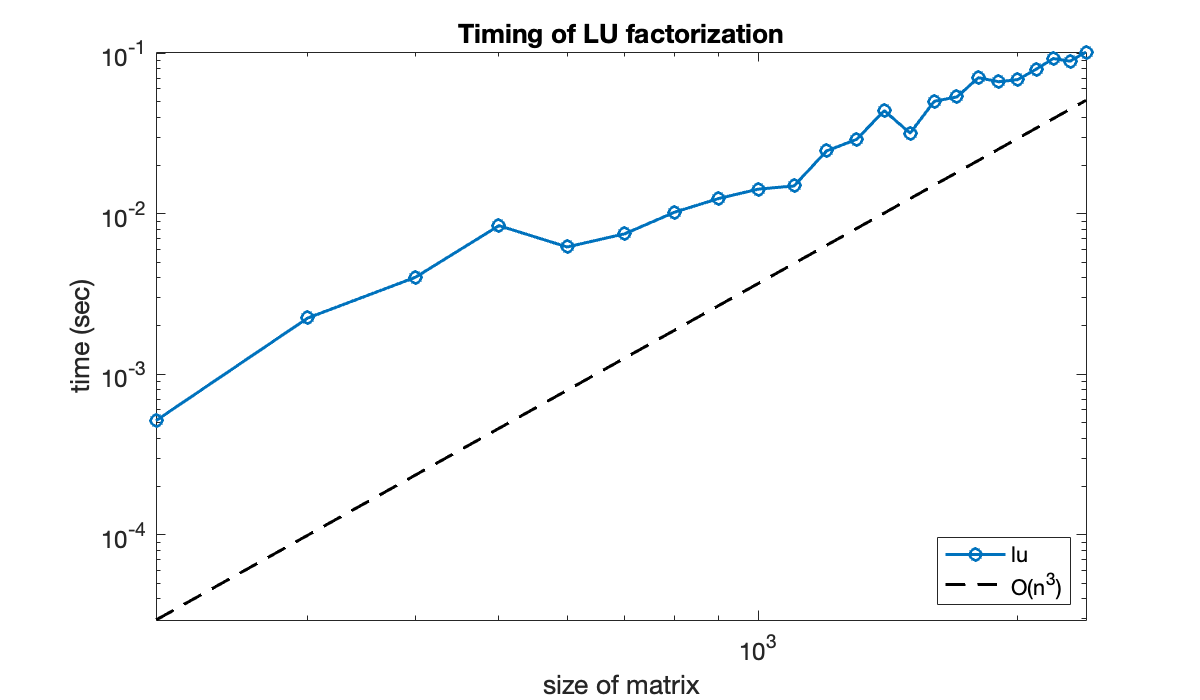

In [27]:
clf
loglog(n, t, 'o-')
hold on
loglog(n, 0.5 * t(end) * (n/n(end)).^3, 'k--')
axis tight
xlabel('size of matrix'), ylabel('time (sec)')
title('Timing of LU factorization')
legend('lu','O(n^3)','location','southeast');